#  Change_quantiles

First fixes a corridor given by the quantiles ql and qh of the distribution of x. Then calculates the average, absolute value of consecutive changes of the series x inside this corridor.

ql :lower quantile<br>
qh : higher quantile

[ql - qh] 분위구간 안에서 데이터가 연속적으로 나타나는 값의 차이 평균 또는 분산을 반환

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tsfresh.feature_extraction import settings, extract_features

In [2]:
np.random.seed(1000)

## Example 01

In [3]:
ex1 = np.random.rand(30)

[0.65358959 0.11500694 0.95028286 0.4821914  0.87247454 0.21233268
 0.04070962 0.39719446 0.2331322  0.84174072 0.20708234 0.74246953
 0.39215413 0.18225652 0.74353941 0.06958208 0.8853372  0.9526444
 0.93114343 0.41543095 0.02898166 0.98202748 0.33963768 0.70668719
 0.36187707 0.0351059  0.85505825 0.65725351 0.76568299 0.55408724]


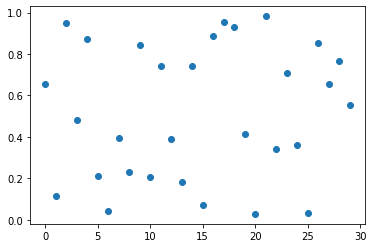

In [4]:
print(ex1)

plt.plot(ex1, 'o')

0.39517832793095997
0.8585415096287335


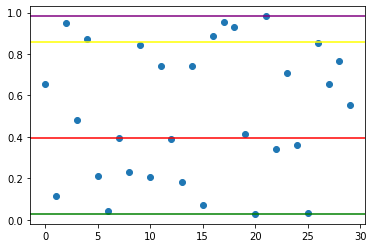

In [5]:
ex1_series = pd.Series(ex1)

# ql = lower quantile
# qh = higher quantile

q0 = ex1_series.quantile(0.0)
ql = ex1_series.quantile(0.4)
qh = ex1_series.quantile(0.8)
q1 = ex1_series.quantile(1.0)

print(ql)
print(qh)
ax = plt.subplot()
ax.plot(ex1, 'o')
ax.axhline(ql, color = 'red')
ax.axhline(qh, color = 'yellow')
ax.axhline(q0, color = 'green')
ax.axhline(q1, color = 'purple')

In [24]:
n_ql = 0.4
n_qh = 0.8

# [ql, qh]분위에 해당하는 값 = True
bin_cat = pd.qcut(ex1, [n_ql, n_qh], labels = False)
bin_cat_0 = bin_cat == 0 

bin_cat_0

array([ True, False, False,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True,  True,  True])

In [25]:
np.sum(bin_cat_0)

12

calculates mean of consecutive changes of the series x

In [26]:
def _roll(a, shift):
    if not isinstance(a, np.ndarray):
        a = np.asarray(a)
    idx = shift % len(a)
    return np.concatenate([a[-idx:], a[:-idx]])

_roll(bin_cat_0, 1)

array([ True,  True, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True])

In [27]:
a = bin_cat_0 # [ql:qh]에 해당하는 값
b = _roll(bin_cat_0, 1) # bin_cat_0의 값을 한칸 씩 뒤로 미룸 

# 연속적으로 나타나는 값을 찾기 위해 두 값을 비교하여 일치하는 값을 찾음 
# 연속적인 데이터만 = True
ind = (a & b)[1: ]
ind

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True])

In [28]:
ind_inside_corridor = np.where(ind ==1)

ind_inside_corridor # 연속적인 데이터 값의 index

(array([26, 27, 28]),)

In [29]:
# 데이터의 차분을 구함 

div = np.diff(ex1)

div

array([-0.53858264,  0.83527592, -0.46809146,  0.39028313, -0.66014185,
       -0.17162306,  0.35648484, -0.16406226,  0.60860853, -0.63465838,
        0.53538719, -0.35031541, -0.20989761,  0.56128289, -0.67395733,
        0.81575512,  0.06730719, -0.02150096, -0.51571248, -0.38644929,
        0.95304583, -0.6423898 ,  0.36704951, -0.34481013, -0.32677117,
        0.81995236, -0.19780475,  0.10842949, -0.21159576])

In [30]:
# 차분 array 중 해당하는 값을 찾음 

c = div[ind_inside_corridor]

c

array([-0.19780475,  0.10842949, -0.21159576])

In [31]:
# [0.4 - 0.8] 분위 구간안에서 연속적으로 나타는 값의 차분의 평균을 구함 

np.mean(c)

-0.10032367174533792

## tsfresh 

In [32]:
ex1_c = ex1.copy()
ex1_c = pd.DataFrame(ex1_c)
ex1_c['id'] = 0

In [33]:
settings = {'change_quantiles': [{'ql': 0.4, 'qh': 0.8, 'isabs': False, 'f_agg': 'mean'} ]}

In [34]:
change_quantiles = extract_features(ex1_c, column_id='id', default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 476.25it/s]


In [35]:
change_quantiles

,"0__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4"
0,-0.100324


## Example 02

In [36]:
ex2 = np.random.randn(30)

ex2

array([-0.83532823, -1.69499832,  1.13341723,  1.04853072, -2.12832537,
       -1.43713939,  0.17793711,  1.39442275,  0.29132019, -0.08200619,
        0.64424261,  0.32807995,  0.85743275, -0.93696928,  0.18007496,
       -1.42337059, -0.36775578, -1.52328799, -0.6347717 ,  0.98740384,
       -1.01601962,  2.04572375,  0.24999852,  0.65116253, -1.26602354,
        1.3741556 , -0.60990513,  0.03075795,  0.81965668,  1.45431373])

-1.0660204049844086
0.3060240905210299


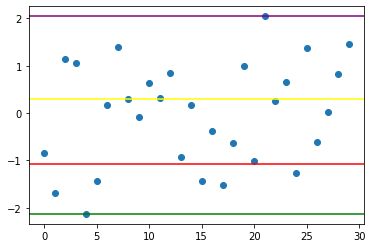

In [37]:
ex2_series = pd.Series(ex2)

q0 = ex2_series.quantile(0.0)
ql = ex2_series.quantile(0.2)
qh = ex2_series.quantile(0.6) 
q1 = ex2_series.quantile(1.0)

print(ql)
print(qh)

ax = plt.subplot()
ax.plot(ex2, 'o')
ax.axhline(ql, color = 'red')
ax.axhline(qh, color = 'yellow')
ax.axhline(q0, color = 'green')
ax.axhline(q1, color = 'purple')

In [22]:
cnt = 0
for i in range(len(ex2)):
    if ql <= ex2_series[i] <= qh:
        cnt += 1

cnt

12

In [38]:
n_ql = 0.2
n_qh = 0.6
bin_cat = pd.qcut(ex2, [n_ql, n_qh], labels = False)
bin_cat_0 = bin_cat == 0 

np.sum(bin_cat_0)

12

In [39]:
idx = (bin_cat_0 & _roll(bin_cat_0, 1))[1:]
idx_inside_corridor = np.where(idx ==1)

idx_inside_corridor


(array([ 8, 13, 26]),)

In [40]:
div = np.diff(ex2)

div[idx_inside_corridor]

array([-0.37332638,  1.11704424,  0.64066307])

In [41]:
# [0.2 - 0.4] 분위에서 연속적으로 나타는 값의 차분의 평균을 구함 

np.mean(div[idx_inside_corridor])

0.46146031030624085

## tsfresh

In [42]:
ex2_c = ex2.copy()
ex2_c = pd.DataFrame(ex2_c)
ex2_c['id'] = 0

In [43]:
settings = {'change_quantiles': [{'ql': 0.2, 'qh': 0.6, 'isabs': False, 'f_agg': 'mean'} ]}

In [44]:
change_quantiles = extract_features(ex2_c, column_id ='id', default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 652.30it/s]


In [45]:
change_quantiles

,"0__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2"
0,0.46146


### Reference

* pandas <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

* tsfresh<br>
https://tsfresh.readthedocs.io/en/latest/_modules/tsfresh/feature_extraction/feature_calculators.html#change_quantiles<br>
https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html

* blog<br>
https://kongdols-room.tistory.com/175